In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (256,256),
    batch_size = 32
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

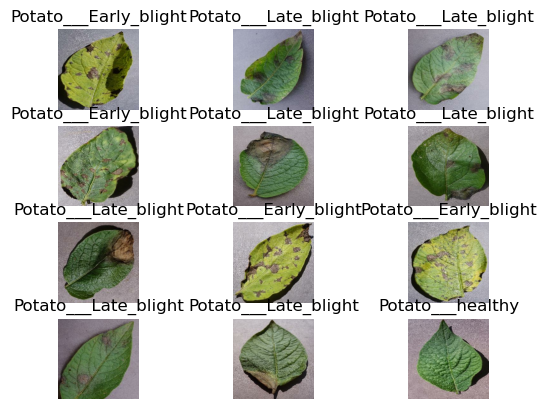

In [6]:
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(4,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
# SPLITING INTO TRAIN,TEST AND VALIDATION
train_size = 0.8
len(dataset)*train_size
train_ds = dataset.take(54)
test_val_ds = dataset.skip(54)
val_size = 0.1
len(dataset)*val_size
val_ds = test_val_ds.take(6)
test_ds = test_val_ds.skip(6)

In [8]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [9]:
resizing_rescaling = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1/255)
])

In [10]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
])

In [11]:
input_shape = (32,256,256,3)
model = models.Sequential([
    resizing_rescaling,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation = 'relu' , input_shape = input_shape),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3),activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3),activation = 'relu'),
    layers.MaxPooling2D(2,2),    
    layers.Conv2D(64,kernel_size=(3,3),activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3),activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3),activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(3,activation = 'softmax'),
])
model.build(input_shape = input_shape)

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [13]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics = ['accuracy']
)

In [14]:
history = model.fit(
   train_ds,
    epochs=10,
    batch_size=32,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
54/54 [==============================] - 237s 4s/step - loss: 0.8675 - accuracy: 0.5897 - val_loss: 0.8340 - val_accuracy: 0.6823
Epoch 2/10
54/54 [==============================] - 182s 3s/step - loss: 0.6098 - accuracy: 0.7396 - val_loss: 0.4865 - val_accuracy: 0.7865
Epoch 3/10
54/54 [==============================] - 180s 3s/step - loss: 0.4233 - accuracy: 0.8223 - val_loss: 0.2598 - val_accuracy: 0.8958
Epoch 4/10
54/54 [==============================] - 201s 4s/step - loss: 0.3341 - accuracy: 0.8686 - val_loss: 0.1954 - val_accuracy: 0.9375
Epoch 5/10
54/54 [==============================] - 263s 5s/step - loss: 0.2481 - accuracy: 0.9091 - val_loss: 0.2944 - val_accuracy: 0.8906
Epoch 6/10
54/54 [==============================] - 217s 4s/step - loss: 0.1903 - accuracy: 0.9259 - val_loss: 0.1906 - val_accuracy: 0.9219
Epoch 7/10
54/54 [==============================] - 182s 3s/step - loss: 0.2183 - accuracy: 0.9190 - val_loss: 0.2448 - val_accuracy: 0.9010
Epoch 8/10
54

In [15]:
score = model.evaluate(test_ds)

8/8 [==============================] - 9s 789ms/step - loss: 0.2329 - accuracy: 0.9095


In [16]:
score

[0.23292744159698486, 0.9094827771186829]

In [17]:
history.history['accuracy']

[0.5896990895271301,
 0.7395833134651184,
 0.8223379850387573,
 0.8686342835426331,
 0.9091435074806213,
 0.9259259104728699,
 0.9189814925193787,
 0.9490740895271301,
 0.9635416865348816,
 0.9560185074806213]

In [18]:
history.history['loss']

[0.867508053779602,
 0.609787106513977,
 0.42327365279197693,
 0.33409613370895386,
 0.2480829507112503,
 0.19033296406269073,
 0.2182525396347046,
 0.13940094411373138,
 0.1033608615398407,
 0.11222508549690247]